In [ ]:
##download extra weights (requires gdown--> pip install gdown)
#gdown -O weights/Cnn14Weights.pth https://drive.google.com/uc?id=1SUuSb4WZH4GoIIJln_81TZaW4wepzCgg

In [1]:
import torch
import matplotlib.pyplot as plt

from torchvision import transforms
from SpectraProject.pytorch.models import Base_CNN14
from SpectraProject.pytorch.datasets import Demo_Inference_Dataset
from SpectraProject.pytorch.pytorch_utils import softmax_preds
from SpectraProject.pytorch.pytorch_utils import ToTensor, get_interpolation_mode

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [2]:
with open('data/demo_samples_list.txt', 'r') as data_txt:
  data_lines = data_txt.readlines()
samples_list_txt = [elemen.strip().split('\t') for elemen in data_lines]
samples_list_txt

[['data/BLEN7M_20110530_054509_24.fit.gz', '924', '1164'],
 ['data/BLEN7M_20110530_054509_25.fit.gz', '924', '1164'],
 ['data/BLEN7M_20110601_133010_25.fit.gz', '1400', '1640'],
 ['data/BLEN7M_20110601_133010_25.fit.gz', '1640', '1880'],
 ['data/BLEN7M_20110312_151517_24.fit.gz', '2332', '2572'],
 ['data/BLEN7M_20110312_151517_24.fit.gz', '2572', '2812'],
 ['data/BLEN7M_20110312_151517_25.fit.gz', '2332', '2572'],
 ['data/BLEN7M_20110312_151517_25.fit.gz', '2572', '2812']]

In [3]:
#if pytorch cannot recognize this version of InterpolationMode
#use get_interpolation_mode('PIL') instead
IntMode = get_interpolation_mode('torchvision')
#creating dataset
inference_dset = Demo_Inference_Dataset(samples_list_txt,
                  transform=transforms.Compose([ToTensor(),
                                                transforms.Resize((200, 240), interpolation=IntMode.NEAREST)]))
#defining Model and loading weights
model = Base_CNN14(2).to(device)
model.load_state_dict(torch.load('weights/Cnn14Weights.pth', map_location=device))
model.eval()

Base_CNN14(
  (conv_block_1): ConvBlock(
    (conv_1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (conv_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn_2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (drop_1): Dropout(p=0.2, inplace=False)
  (conv_block_2): ConvBlock(
    (conv_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (conv_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn_1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn_2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (drop_2): Dropout(p=0.2, inplace=False)
  (conv_block_3): ConvBlock(
    (conv_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), pad

class_prediction:1-flare item:data/BLEN7M_20110530_054509_24.fit.gz


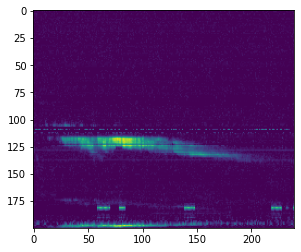

class_prediction:1-flare item:data/BLEN7M_20110530_054509_25.fit.gz


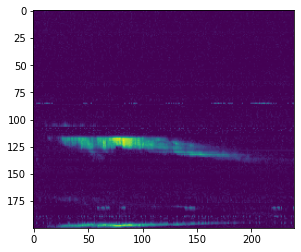

class_prediction:1-flare item:data/BLEN7M_20110601_133010_25.fit.gz


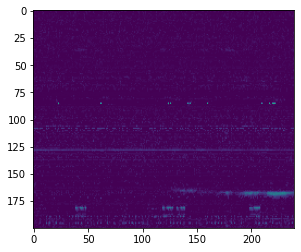

class_prediction:1-flare item:data/BLEN7M_20110601_133010_25.fit.gz


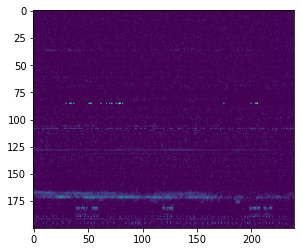

class_prediction:1-flare item:data/BLEN7M_20110312_151517_24.fit.gz


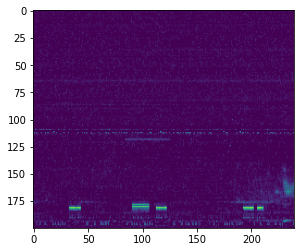

class_prediction:1-flare item:data/BLEN7M_20110312_151517_24.fit.gz


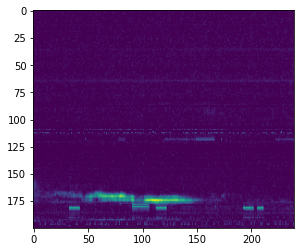

class_prediction:1-flare item:data/BLEN7M_20110312_151517_25.fit.gz


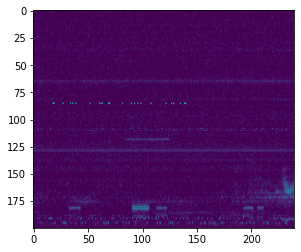

class_prediction:1-flare item:data/BLEN7M_20110312_151517_25.fit.gz


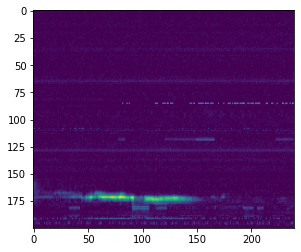

In [5]:
with torch.no_grad():
  for sample in inference_dset:
    sample, item = sample[0].unsqueeze(0).to(device), sample[1]
    output = model(sample)
    preds = softmax_preds(output)
    pred_class = 'flare' if preds.item()==1 else 'no flare' if preds.item()==0 else None
    print('class_prediction:%d-%s item:%s' %(preds.item(), pred_class, item))
    plt.imshow(sample.squeeze(0).squeeze(0), vmin=0)
    plt.show()